In [1]:
# Plot the Multi-endpoint acute toxicity performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
from scipy.interpolate import interp1d

In [2]:
df = pd.read_csv('./table_results/MTL_results_on_all_endpoints.csv')

In [3]:
df.columns

Index(['Task', 'MT-DNN-RMSE', 'MT-DNN-R2', 'ST-DNN-RMSE', 'ST-DNN-R2',
       'ST-RF-RMSE', 'ST-RF-R2', 'GCNN-RMSE', 'GCNN-R2', 'DLCA-RMSE',
       'DLCA-R2', 'MT-NYAN-RMSE (single latent)', 'MT-NYAN-R2 (single latent)',
       'MT-NYAN-RMSE (5 random latents)', 'MT-NYAN-R2 (5 random latents)'],
      dtype='object')

In [4]:
endpoints = df['Task'].values[:59]

MT_DNN_RMSE = df['MT-DNN-RMSE'].values[:59]
MT_DNN_RMSE_avg = MT_DNN_RMSE.mean()
MT_DNN_R2 = df['MT-DNN-R2'].values[:59]
MT_DNN_R2_avg = MT_DNN_R2.mean()

ST_DNN_RMSE = df['ST-DNN-RMSE'].values[:59]
ST_DNN_RMSE_avg = ST_DNN_RMSE.mean()
ST_DNN_R2 = df['ST-DNN-R2'].values[:59]
ST_DNN_R2_avg = ST_DNN_R2.mean()

ST_RF_RMSE = df['ST-RF-RMSE'].values[:59]
ST_RF_RMSE_avg = ST_RF_RMSE.mean()
ST_RF_R2 = df['ST-RF-R2'].values[:59]
ST_RF_R2_avg = ST_RF_R2.mean()

GCNN_RMSE = df['GCNN-RMSE'].values[:59]
GCNN_RMSE_avg = GCNN_RMSE.mean()
GCNN_R2 = df['GCNN-R2'].values[:59]
GCNN_R2_avg = GCNN_R2.mean()

DLCA_RMSE = df['DLCA-RMSE'].values[:59]
DLCA_RMSE_avg = DLCA_RMSE.mean()
DLCA_R2 = df['DLCA-R2'].values[:59]
DLCA_R2_avg = DLCA_R2.mean()

MT_NYAN_RMSE_single = df['MT-NYAN-RMSE (single latent)'].values[:59]
MT_NYAN_RMSE_single_avg = MT_NYAN_RMSE_single.mean()
MT_NYAN_R2_single = df['MT-NYAN-R2 (single latent)'].values[:59]
MT_NYAN_R2_single_avg = MT_NYAN_R2_single.mean()

MT_NYAN_RMSE_5_latents = df['MT-NYAN-RMSE (5 random latents)'].values[:59]
MT_NYAN_RMSE_5_latents_avg = MT_NYAN_RMSE_5_latents.mean()
MT_NYAN_R2_5_latents = df['MT-NYAN-R2 (5 random latents)'].values[:59]
MT_NYAN_R2_5_latents_avg = MT_NYAN_R2_5_latents.mean()

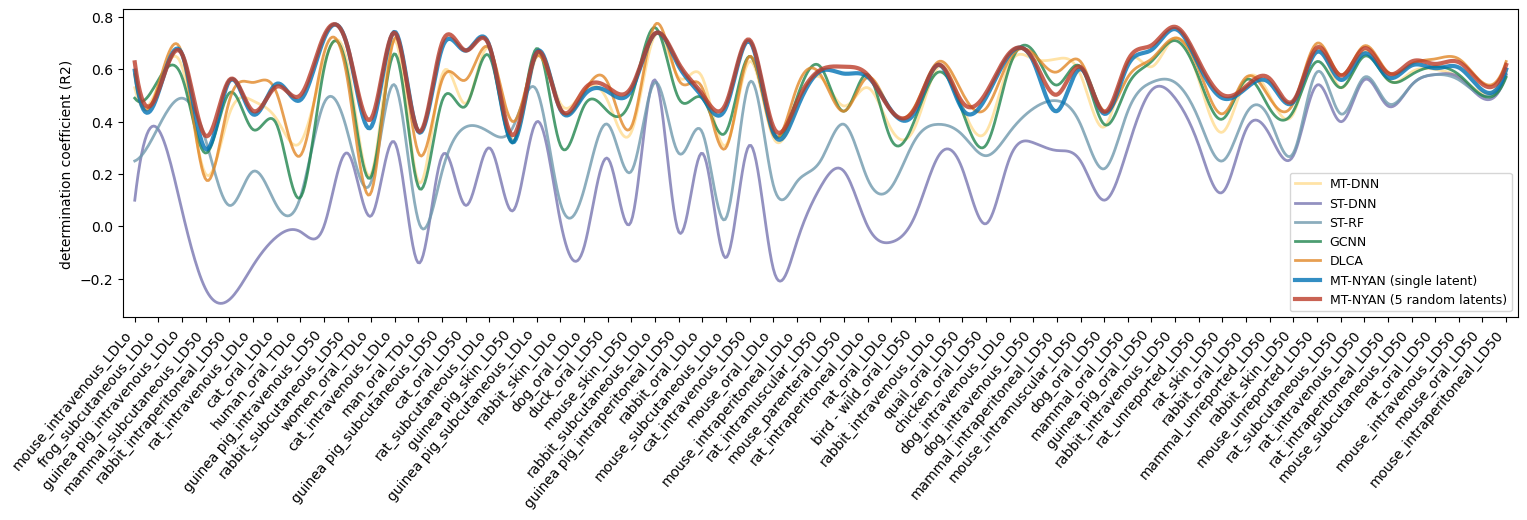

In [6]:
# smooth  R2
x = np.array(range(0,59))
f_MT_DNN_R2 = interp1d(x, MT_DNN_R2, kind='cubic')
f_ST_DNN_R2 = interp1d(x, ST_DNN_R2, kind='cubic')
f_ST_RF_R2 = interp1d(x, ST_RF_R2, kind='cubic')
f_GCNN_R2 = interp1d(x, GCNN_R2, kind='cubic')
f_DLCA_R2 = interp1d(x, DLCA_R2, kind='cubic')
f_MT_NYAN_R2_single = interp1d(x, MT_NYAN_R2_single, kind='cubic')
f_MT_NYAN_R2_5_latents = interp1d(x, MT_NYAN_R2_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_R2 = f_MT_DNN_R2(x)
new_ST_DNN_R2 = f_ST_DNN_R2(x)
new_ST_RF_R2 = f_ST_RF_R2(x)
new_GCNN_R2 = f_GCNN_R2(x)
new_DLCA_R2 = f_DLCA_R2(x)
new_MT_NYAN_R2_single = f_MT_NYAN_R2_single(x)
new_MT_NYAN_R2_5_latents = f_MT_NYAN_R2_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_R2, '-', c='#FFDC91CC', label='MT-DNN', linewidth=2, alpha=0.8)
ax1.plot(x, new_ST_DNN_R2, '-',c='#7876B1CC', label='ST-DNN',linewidth=2, alpha=0.8)
ax1.plot(x, new_ST_RF_R2, '-',c='#6F99ADCC', label='ST-RF',linewidth=2, alpha=0.8)
ax1.plot(x, new_GCNN_R2, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.8)
ax1.plot(x, new_DLCA_R2, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.8)
ax1.plot(x, new_MT_NYAN_R2_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.8)
ax1.plot(x, new_MT_NYAN_R2_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.8)

ax1.legend()
ax1.set_ylabel('determination coefficient (R2)')
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks(range(0,59,1))
ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
plt.legend(fontsize=9)
fig.savefig('figures/MTL_59endpoint(R2).svg', bbox_inches='tight', pad_inches=0.1)

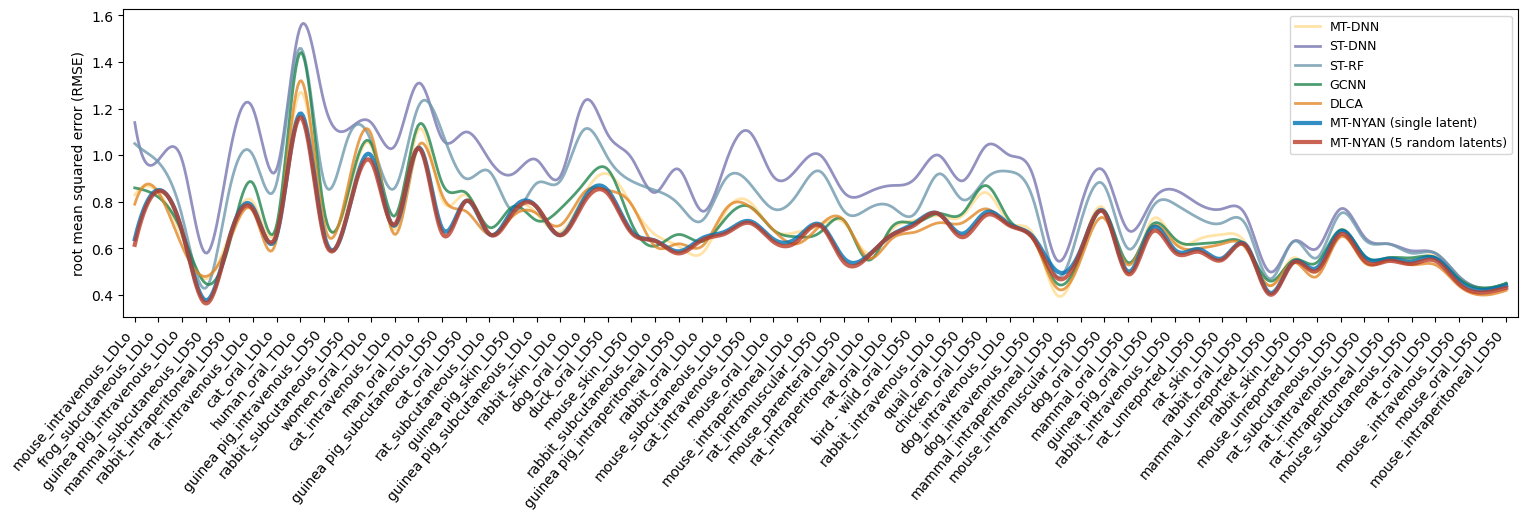

In [7]:
# smooth  RMSE
x = np.array(range(0,59))
f_MT_DNN_RMSE = interp1d(x, MT_DNN_RMSE, kind='cubic')
f_ST_DNN_RMSE = interp1d(x, ST_DNN_RMSE, kind='cubic')
f_ST_RF_RMSE = interp1d(x, ST_RF_RMSE, kind='cubic')
f_GCNN_RMSE = interp1d(x, GCNN_RMSE, kind='cubic')
f_DLCA_RMSE = interp1d(x, DLCA_RMSE, kind='cubic')
f_MT_NYAN_RMSE_single = interp1d(x, MT_NYAN_RMSE_single, kind='cubic')
f_MT_NYAN_RMSE_5_latents = interp1d(x, MT_NYAN_RMSE_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_RMSE = f_MT_DNN_RMSE(x)
new_ST_DNN_RMSE = f_ST_DNN_RMSE(x)
new_ST_RF_RMSE = f_ST_RF_RMSE(x)
new_GCNN_RMSE = f_GCNN_RMSE(x)
new_DLCA_RMSE = f_DLCA_RMSE(x)
new_MT_NYAN_RMSE_single = f_MT_NYAN_RMSE_single(x)
new_MT_NYAN_RMSE_5_latents = f_MT_NYAN_RMSE_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_RMSE, '-', c='#FFDC91CC', label='MT-DNN', linewidth=2,alpha=0.8)
ax1.plot(x, new_ST_DNN_RMSE, '-',c='#7876B1CC', label='ST-DNN',linewidth=2,alpha=0.8)
ax1.plot(x, new_ST_RF_RMSE, '-',c='#6F99ADCC', label='ST-RF',linewidth=2,alpha=0.8)
ax1.plot(x, new_GCNN_RMSE, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.8)
ax1.plot(x, new_DLCA_RMSE, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.8)
ax1.plot(x, new_MT_NYAN_RMSE_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.8)
ax1.plot(x, new_MT_NYAN_RMSE_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.8)

ax1.legend()
ax1.set_ylabel('root mean squared error (RMSE)')
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks(range(0,59,1))
ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
plt.legend(fontsize=9)
fig.savefig('figures/MTL_59endpoint(RMSE).svg', bbox_inches='tight', pad_inches=0.1)

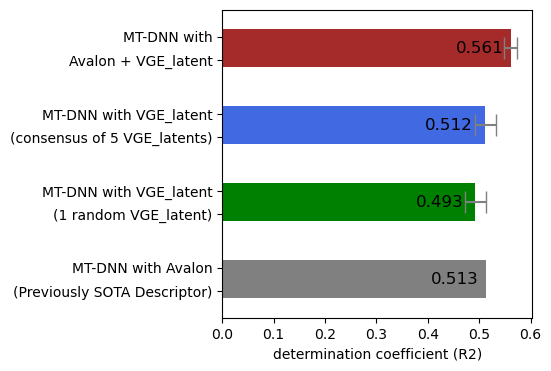

In [20]:
# # plot the avg. performance using bar
# textcolor = 'black'
# fig, ax = plt.subplots(figsize=(4,4))
# R2_AVG = [Avalon_perf_avg, NYAN_1_perf_avg, NYAN_5_perf_avg, Avalon_NYAN_perf_avg]
# R2_std = [0,               NYAN_1_perf_std, NYAN_5_perf_std, Avalon_NYAN_perf_std]
# ax.barh([0], [Avalon_perf_avg], height=0.5, color='grey', align='center', ecolor='grey', capsize=8)
# ax.barh([1], [NYAN_1_perf_avg], height=0.5, color='g', xerr=NYAN_1_perf_std, align='center', ecolor='grey', capsize=8)
# ax.barh([2], [NYAN_5_perf_avg], height=0.5, color='royalblue', xerr=NYAN_5_perf_std, align='center', ecolor='grey', capsize=8)
# ax.barh([3], [Avalon_NYAN_perf_avg], height=0.5, color='brown', xerr=Avalon_NYAN_perf_std, align='center', ecolor='grey', capsize=8)

# ax.set_xlabel('determination coefficient (R2)')
# ax.set_ylim(-0.5,3.5)
# ax.set_yticks([0.15, -0.15, 1.15, 0.85, 2.15, 1.85, 3.15, 2.85], ['MT-DNN with Avalon', '(Previously SOTA Descriptor)', 
#                                                      'MT-DNN with VGE_latent','(1 random VGE_latent)',
#                                                      'MT-DNN with VGE_latent', '(consensus of 5 VGE_latents)', 
#                                                      'MT-DNN with', 'Avalon + VGE_latent'])
# # ax.set_yticks([])

# ax.text(Avalon_perf_avg-0.06, 0-0.1, round(Avalon_perf_avg,3), ha='center', va='bottom', color=textcolor,fontsize=12)
# ax.text(NYAN_1_perf_avg-0.07, 1-0.1, round(NYAN_1_perf_avg,3), ha='center', va='bottom', color=textcolor,fontsize=12)
# ax.text(NYAN_5_perf_avg-0.07, 2-0.1, round(NYAN_5_perf_avg,3), ha='center', va='bottom', color=textcolor,fontsize=12)
# ax.text(Avalon_NYAN_perf_avg-0.06, 3-0.1, round(Avalon_NYAN_perf_avg,3), ha='center', va='bottom', color=textcolor,fontsize=12)
# plt.show()
# fig.savefig('figures/MTL_59endpoint_avg.svg', bbox_inches='tight', pad_inches=0.1)